<a href="https://colab.research.google.com/github/iterat1on/class/blob/main/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [63]:
pd.set_option('display.max_columns', 300)
df = pd.read_csv('/content/drive/MyDrive/sample_data/df.csv')
#df = df[df['s_teukbyul_si/do'] == '부산광역시']
#df = df[df.path.str.contains('공항앞길')]
#df.to_csv('/content/drive/MyDrive/sample_data/final_data.csv')

In [66]:
df2 = df[df['path'].str.contains("울만로|공항앞길|공항로|공항진입로|유통단지1로|영종해안북로|영종해안남로|공항연결로|공항서로|남북로|공항로|용유서로|개화동로|공항대로|남부순환로")]
df3 = df2[-df2['path'].str.contains("고속")]

### 누락 레코드 제거

In [74]:
df4= df3[['s'+str(i) for i in range(20, 160, 10)]]
#df2.head()
min_value = np.array([np.arange(20, 160, 10)]).T
med_value = np.array([np.arange(25, 165, 10)]).T
max_value = np.array([np.arange(30, 170, 10)]).T


#df3['min_est_dist'] = np.dot(df2, min_value)/3600
#df3['med_est_dist'] = np.dot(df4, med_value)/3600
#df['max_est_dist'] = np.dot(df2, max_value)/3600

#df['diff1'] = np.abs(df['root_dist(km)'] - df['min_est_dist'])
#df['diff2'] = np.abs(df['root_dist(km)'] - df['med_est_dist'])
df3['diff'] = np.abs(df3['root_dist(km)'] - df3['med_est_dist'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
df3 = df3[df3['diff'] < np.mean(df3['root_dist(km)'])]

In [82]:
df3.to_csv('/content/drive/MyDrive/removenadf.csv', index = False, encoding ='utf-8-sig')

In [83]:
df = pd.read_csv('/content/drive/MyDrive/removenadf.csv')
df

,max_rpm,s20,s30,s40,s50,s60,s70,s80,s90,s100,s110,s120,s130,s140,s150,path,fee,duration(min),root_dist(km),med_est_dist,diff
0,3051.40,118,136,87,69,0,0,0,0,0,0,0,0,0,0,"마곡중앙8로,공항대로,하늘길",6000,13,4.400,4.283333,0.116667
1,2055.30,48,49,28,0,0,0,0,0,0,0,0,0,0,0,"마곡중앙6로,마곡동로,공항대로",3800,3,0.695,1.159722,0.464722
2,2840.31,163,160,183,140,24,0,0,0,0,0,0,0,0,0,"강서로,화곡로,남부순환로",8600,24,7.500,7.547222,0.047222
3,2379.66,158,89,42,87,0,0,0,0,0,0,0,0,0,0,"화곡로,남부순환로,남부순환로70길",5600,12,4.200,3.816667,0.383333
4,2540.72,145,92,51,56,0,0,0,0,0,0,0,0,0,0,"강서로,공항대로,등촌로",5000,11,3.600,3.394444,0.205556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,958.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"공항앞길,-,-",4550,1,0.025,0.000000,0.025000
7772,3493.36,312,264,183,362,320,193,279,0,0,0,0,0,0,0,"공항로,르노삼성대로,거가대로",35430,31,27.000,28.937500,1.937500
7773,2458.34,138,188,189,311,1412,365,665,43,0,0,0,0,0,0,"공항로,르노삼성대로,거가대로",81490,58,60.000,59.834722,0.165278
7774,901.13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"공항앞길,-,-",4550,1,0.025,0.000000,0.025000


###주행 총 레코드가 0인 데이터 제거

In [ ]:
df = df[df['max_est_dist'] > 0]

##1차 클러스터링(지역 및 비슷한 운행으로 군집)

###정규화

In [85]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상

data = df.copy()[['duration(min)', 'root_dist(km)', 'fee']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [ ]:
data.corr()

###PCA

In [93]:
from sklearn.decomposition import PCA
X = data_scale.copy()

pca = PCA(n_components=2)

pca.fit(X)
x_pca = pca.transform(X)

In [94]:
pca.explained_variance_ratio_

array([0.96902216, 0.02887762])

In [95]:
pca_df = pd.DataFrame(x_pca, columns=['pc1', 'pc2'])
pca_df

,pc1,pc2
0,0.092511,0.071700
1,-0.027007,0.011756
2,0.217903,0.140619
3,0.080941,0.066057
4,0.065622,0.063244
...,...,...
7771,-0.044952,-0.007515
7772,0.537164,-0.035936
7773,1.206555,-0.204910
7774,-0.044952,-0.007515


In [96]:
x = [] 
y = []  

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(pca_df)
    
    x.append(k)
    y.append(kmeans.inertia_)

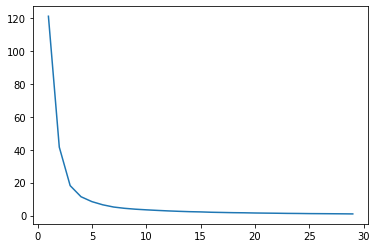

In [97]:
plt.plot(x, y);

In [98]:
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit(pca_df)
pca_df['clusters'] = clusters.labels_

In [99]:
pca_df.clusters.value_counts()


0    6340
4     759
3     440
1     194
2      43
Name: clusters, dtype: int64

In [102]:
#df = df.drop(columns = ['level_0', 'index'])
df.reset_index(inplace = True)

In [107]:
cluster_df = pd.concat([df, pca_df], axis = 1)


In [111]:
cluster_df.to_csv('/content/drive/MyDrive/clusterdf.csv', encoding = 'utf-8', index = False)

###평균속도 구하기

##모델링

##최적의 k 찾기(엘보우 기법)

In [ ]:
# 엘보우 기법 (오차제곱합의 값이 최소가 되도록 결정하는 방법)
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(data_scale, 10)

###클러스터링 시각화

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'duration(min)'], df.loc[df['cluster'] == i, 'root_dist(km)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('duration(min)', size = 12)
plt.ylabel('root_dist(km)', size = 12)
plt.show()

In [ ]:
df_short = df[df.cluster == 0]
df_mid= df[df.cluster == 4]
df_long = df[df.cluster == 1]

###folium을 통해 경로 시각화

In [ ]:
import folium
center = [36.6,126.99]
m= folium.Map(location = center, zoom_start = 12)

In [ ]:

newdf['s'] = newdf[['s_lat','s_lng']].values[:].tolist()
newdf['e'] = newdf[['e_lat','e_lng']].values[:].tolist()


for i in range(len(newdf)):
  line = newdf[['s','e']].values[i].tolist()
  folium.PolyLine(locations = line, tooltip = 'Polyline').add_to(m)

m

##2차 클러스터링(성향을 기준으로 클러스터링)

##속도 파생변수 생성

In [ ]:
newdf

In [ ]:
##속도구간이 30 40 50 정도라고 생각.

newdf['time_sum'] = newdf['s20'] + newdf['s30'] + newdf['s40'] + newdf['s50'] + newdf['s60']+newdf['s70']+newdf['s80']+newdf['s90']+newdf['s100']+newdf['s110']+newdf['s120']+newdf['s130']+newdf['s140']+newdf['s150']
newdf['fasttime_sum'] = newdf['s50'] + newdf['s60']+newdf['s70']+newdf['s80']+newdf['s90']+newdf['s100']+newdf['s110']+newdf['s120']+newdf['s130']+newdf['s140']+newdf['s150']
newdf['ratio'] = newdf['fasttime_sum']/newdf['time_sum']

In [ ]:
newdf

In [ ]:
#과속 여부 판단 함수
def overspeed():
  



###파생변수 생성후 다시 2차 클러스터링 진행

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#feature를 대상
data = df_short[['max_rpm', 'fasttime_sum','ratio']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [ ]:
from sklearn.cluster import KMeans

k = 2

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df_short['cluster'] = model.fit_predict(data_scale)

In [ ]:
df_short['cluster'].value_counts()

In [ ]:
df_short[df_short.cluster == 0].describe()

In [ ]:
df_short[df_short.cluster == 1].describe()

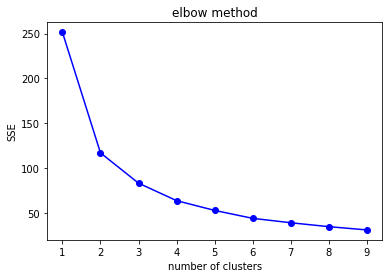

In [ ]:
# 엘보우 기법 (오차제곱합의 값이 최소가 되도록 결정하는 방법)
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(data_scale, 10)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df_short.loc[df_short['cluster'] == i, 'duration(min)'], df_short.loc[df['cluster'] == i, 'root_dist(km)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('duration(min)', size = 12)
plt.ylabel('root_dist(km)', size = 12)
plt.show()

In [ ]:
newdf

,index,s_date,e_date,s_lat,s_lng,e_lat,e_lng,max_rpm,s20,s30,s40,s50,s60,s70,s80,s90,s100,s110,s120,s130,s140,s150,start_gps,end_gps,distance,airport_start,airport_end,start_add,end_add,s_teukbyul_si/do,s_teukbyulsi/goon/gu,s_dong/eup/myun,e_teukbyulsi/do,e_teukbyulsi/goon/gu,e_dong/eup/myun,road_list,fee,s_Datetime,e_Datetime,s_hour,day_or_night,road_1,road_2,road_3,path,duration(min),root_dist(km),path11,path22,path33,min_est_dist,med_est_dist,max_est_dist,diff1,diff2,diff3,pc1,pc2,clusters,time_sum,fasttime_sum,ratio
0,258,2022-05-30 6:00,2022-05-30 7:00,35.176815,128.950878,35.177655,128.950687,2484.360000,3,3,0,0,0,0,0,0,0,0,0,0,0,0,"35.176815, 128.9508783","35.1776549, 128.9506866",0.095004,True,True,부산광역시 강서구 대저2동 2162-2,부산광역시 강서구 대저2동 2157,부산광역시,강서구,대저2동,부산광역시,강서구,대저2동,미확인 공항앞길 51m,3800,2022-05-30 06:00:00,2022-05-30 07:00:00,6,1,공항앞길,-,-,"공항앞길,-,-",1,0.118,공항앞길,-,-,0.041667,0.050000,0.058333,0.076333,0.068000,0.059667,-0.149530,-0.055295,1,6,0,0.000000
1,386,2022-03-02 6:00,2022-03-02 6:00,35.179807,128.953510,35.176867,128.950805,1547.000000,44,9,0,0,0,0,0,0,0,0,0,0,0,0,"35.1798066, 128.95351","35.1768666, 128.950805",0.409040,True,True,부산광역시 강서구 대저2동 2060-2,부산광역시 강서구 대저2동 2162-2,부산광역시,강서구,대저2동,부산광역시,강서구,대저2동,미확인 공항앞길 421m,3800,2022-03-02 06:00:00,2022-03-02 06:00:00,6,1,공항앞길,-,-,"공항앞길,-,-",1,0.436,공항앞길,-,-,0.319444,0.393056,0.466667,0.116556,0.042944,0.030667,-0.113759,-0.047452,1,53,0,0.000000
2,389,2022-03-07 12:00,2022-03-07 12:00,35.176848,128.950687,35.173125,128.952195,1523.610000,23,44,0,0,0,0,0,0,0,0,0,0,0,0,"35.1768483, 128.9506866","35.1731249, 128.952195",0.436132,True,True,부산광역시 강서구 공항앞길 116,부산광역시 강서구 공항앞길163번길 95-1,부산광역시,강서구,공항앞길,부산광역시,강서구,공항앞길163번길,서행 공항앞길 438m 미확인 공항앞길163번길 103m,3800,2022-03-07 12:00:00,2022-03-07 12:00:00,12,1,공항앞길,공항앞길163번길,-,"공항앞길,공항앞길163번길,-",1,0.584,공항앞길,공항앞길163번길,-,0.494444,0.587500,0.680556,0.089556,0.003500,0.096556,-0.097111,-0.043802,1,67,0,0.000000
3,390,2022-03-07 22:00,2022-03-07 22:00,35.173172,128.952285,35.176842,128.950810,1770.530000,5,13,13,24,0,0,0,0,0,0,0,0,0,0,"35.1731716, 128.952285","35.1768416, 128.95081",0.429542,True,True,부산광역시 강서구 공항앞길163번길 95-1,부산광역시 강서구 공항앞길 116,부산광역시,강서구,공항앞길163번길,부산광역시,강서구,공항앞길,정체 공항앞길163번길 103m 서행 공항앞길 382m,3800,2022-03-07 22:00:00,2022-03-07 22:00:00,22,1,공항앞길163번길,공항앞길,-,"공항앞길163번길,공항앞길,-",1,0.584,공항앞길163번길,공항앞길,-,0.613889,0.690278,0.766667,0.029889,0.106278,0.182667,-0.097111,-0.043802,1,55,24,0.436364
4,395,2022-04-03 7:00,2022-04-03 8:00,35.176902,128.950912,35.177783,128.950757,1366.100000,13,0,0,0,0,0,0,0,0,0,0,0,0,0,"35.1769016, 128.9509116","35.1777833, 128.9507566",0.099048,True,True,부산광역시 강서구 대저2동 2162-5,부산광역시 강서구 대저2동 2156,부산광역시,강서구,대저2동,부산광역시,강서구,대저2동,미확인 공항앞길 51m,3800,2022-04-03 07:00:00,2022-04-03 08:00:00,7,1,공항앞길,-,-,"공항앞길,-,-",1,0.118,공항앞길,-,-,0.072222,0.090278,0.108333,0.045778,0.027722,0.009667,-0.149530,-0.055295,1,13,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,15392,2021-09-04 3:00,2021-09-04 3:00,35.176800,128.953745,35.176768,128.950645,2237.880000,0,29,14,0,0,0,0,0,0,0,0,0,0,0,"35.1768, 128.953745","35.1767683, 128.9506449",0.281785,True,True,부산광역시 강서구 대저2동 2463-8,부산광역시 강서구 공항앞길 116,부산광역시,강서구,대저2동,부산광역시,강서구,공항앞길,미확인 공항로811번나길 3m 미확인 공항앞길51번길 288m 미확인 공항앞길 304m,4550,2021-09-04 03:00:00,2021-09-04 03:00:00,3,0,공항로811번나길,공항앞길51번길,공항앞길,"공항로811번나길,공항앞길51번길,공항앞길",1,0.610,공항로,공항앞길51번길,공항앞길,0.397222,0.456944,0.516667,0.212778,0.153056,0.093333,-0.060507,0.107150,1,43,0,0.000000
2614,15406,2021-09-18 5:00,2021-09-18 5:00,35.176863,128.950907,35.180877,128.954292,1808.910000,15,0,0,0,0,0,0,0,0,0,0,0,0,0,"35.1768633, 128.9509066","35.1808766, 128.9542916",0.542028,True,True,부산광역시 강서구 대저2동 2162-2,부산광역시 강서구 대저2동 1851,부산광역시,강서구,대저2동,부산광역시,강서구,대저2동,미확인 공항앞길 581m 미확인 공항로811번길 75m,4550,2021-09-18 05:00:00,20